Обучение модели...
Предсказание на тестовых данных...
                                      precision    recall  f1-score   support

  Нравится скорость отработки заявок       0.85      0.88      0.86        94
 Нравится качество выполнения заявки       0.82      0.45      0.58        20
Нравится качество работы сотрудников       0.91      0.50      0.65        62
       Понравилось выполнение заявки       0.69      0.35      0.46        69
                        Вопрос решен       0.82      0.36      0.50        64

                           micro avg       0.83      0.55      0.66       309
                           macro avg       0.82      0.51      0.61       309
                        weighted avg       0.82      0.55      0.64       309
                         samples avg       0.55      0.55      0.54       309



c:\Users\Karina\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Karina\AppData\Local\Temp\ipykernel_15440\3275815678.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories_short, y=f1_scores, palette="viridis")


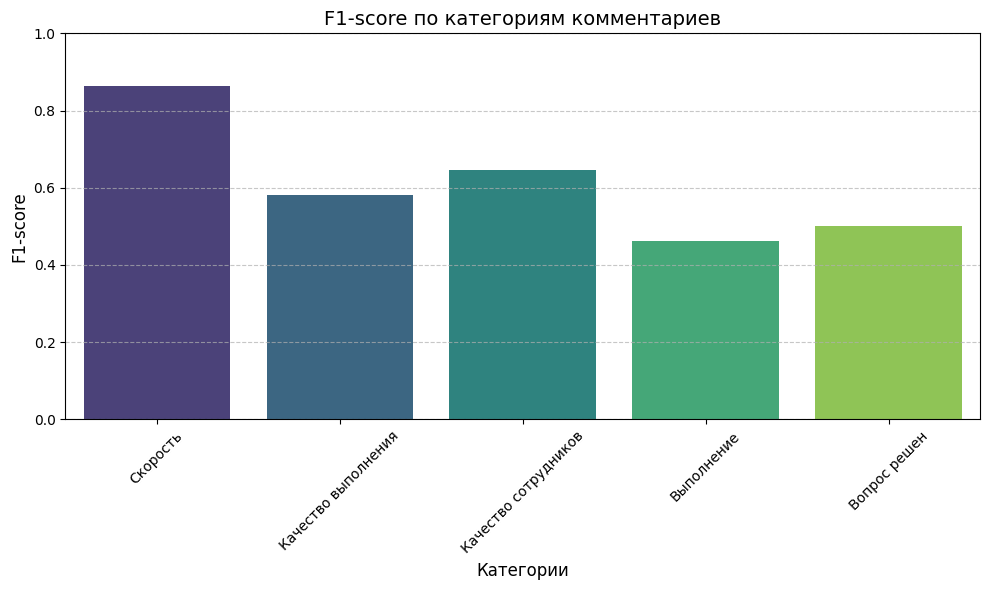

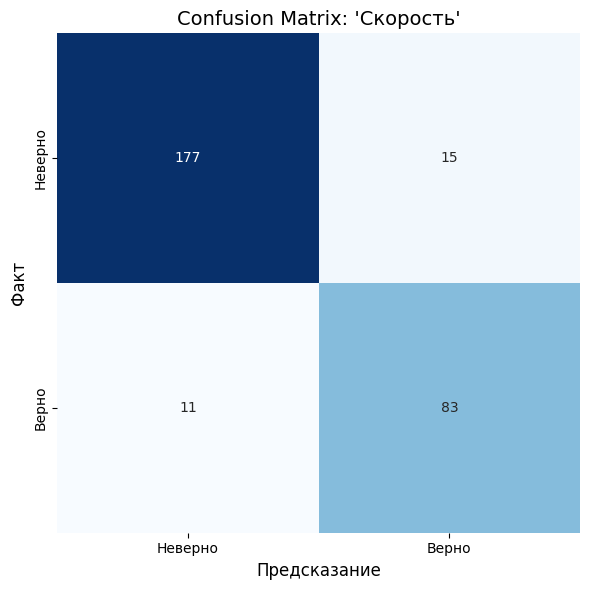

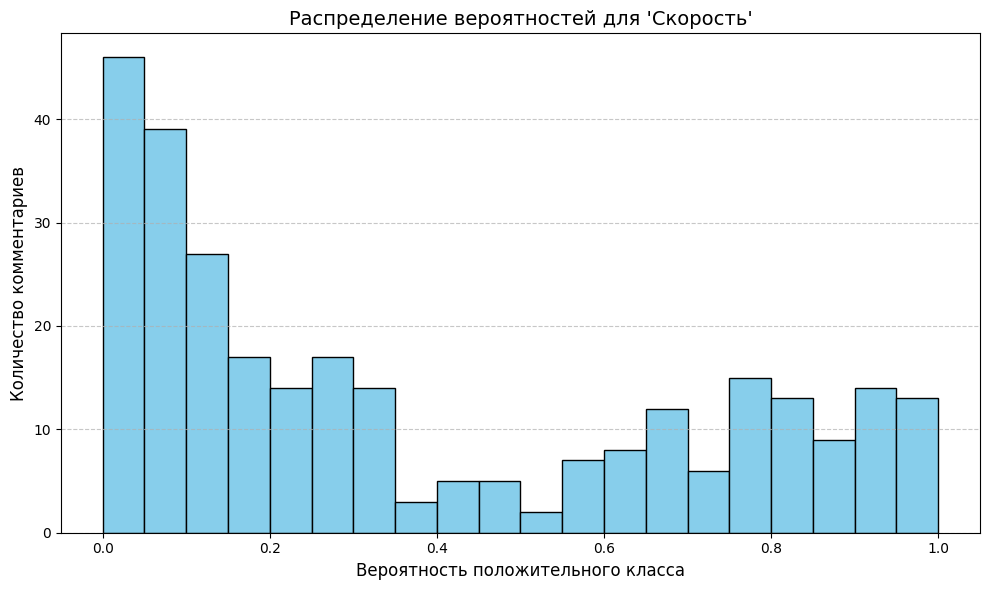

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# Загрузка данных
data = pd.read_csv('размеченные_комментарии.csv')

# Подготовка данных
texts = data['comment'].values
labels = data[['Нравится скорость отработки заявок', 
              'Нравится качество выполнения заявки',
              'Нравится качество работы сотрудников',
              'Понравилось выполнение заявки',
              'Вопрос решен']].values.astype(np.float32)

# Разделение на тренировочную и тестовую выборки
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42)

# Создание пайплайна с TF-IDF и классификатором
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', MultiOutputClassifier(
        RandomForestClassifier(n_estimators=100, random_state=42),
        n_jobs=-1
    ))
])

# Обучение модели
print("Обучение модели...")
pipeline.fit(train_texts, train_labels)

# Предсказание на тестовых данных
print("Предсказание на тестовых данных...")
prob_preds = pipeline.predict_proba(test_texts)

# Получаем вероятности для каждого класса
predictions = []
for i in range(len(prob_preds)):
    class_probs = prob_preds[i][:, 1]  # Берем вероятности положительного класса
    predictions.append(class_probs)
predictions = np.array(predictions).T

# Преобразование вероятностей в бинарные предсказания
threshold = 0.5
binary_preds = (predictions > threshold).astype(int)

# Оценка модели
print(classification_report(test_labels, binary_preds, target_names=[
    'Нравится скорость отработки заявок', 
    'Нравится качество выполнения заявки',
    'Нравится качество работы сотрудников',
    'Понравилось выполнение заявки',
    'Вопрос решен'
]))

# Визуализация метрик
# 1. F1-score по категориям
f1_scores = f1_score(test_labels, binary_preds, average=None)
categories_short = ['Скорость', 'Качество выполнения', 'Качество сотрудников', 'Выполнение', 'Вопрос решен']

plt.figure(figsize=(10, 6))
sns.barplot(x=categories_short, y=f1_scores, palette="viridis")
plt.title("F1-score по категориям комментариев", fontsize=14)
plt.ylim(0, 1)
plt.ylabel("F1-score", fontsize=12)
plt.xlabel("Категории", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('f1_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Confusion Matrix для первой категории
class_idx = 0  # Первая категория
cm = confusion_matrix(test_labels[:, class_idx], binary_preds[:, class_idx])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Неверно', 'Верно'], 
            yticklabels=['Неверно', 'Верно'],
            cbar=False)
plt.title(f"Confusion Matrix: '{categories_short[class_idx]}'", fontsize=14)
plt.xlabel("Предсказание", fontsize=12)
plt.ylabel("Факт", fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Распределение вероятностей для первой категории
plt.figure(figsize=(10, 6))
plt.hist(predictions[:, 0], bins=20, color='skyblue', edgecolor='black')
plt.title(f"Распределение вероятностей для '{categories_short[class_idx]}'", fontsize=14)
plt.xlabel("Вероятность положительного класса", fontsize=12)
plt.ylabel("Количество комментариев", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('prob_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Обучение модели...

ROC-AUC по категориям:
Скорость: 0.931
Качество выполнения: 0.780
Качество сотрудников: 0.871
Выполнение: 0.833
Вопрос решен: 0.932


C:\Users\Karina\AppData\Local\Temp\ipykernel_15440\80492295.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=roc_auc_scores, palette="viridis")


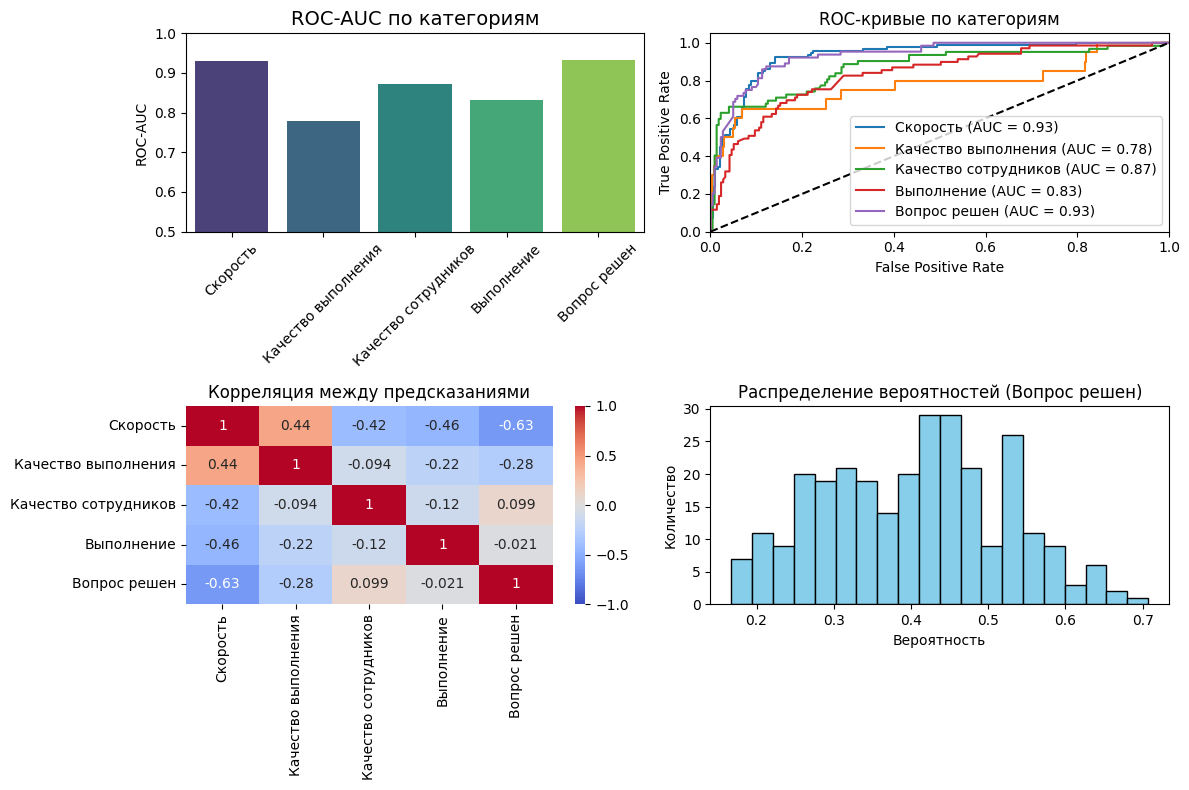

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Загрузка данных
data = pd.read_csv('размеченные_комментарии.csv')

# Подготовка данных
texts = data['comment'].values
labels = data[['Нравится скорость отработки заявок', 
              'Нравится качество выполнения заявки',
              'Нравится качество работы сотрудников',
              'Понравилось выполнение заявки',
              'Вопрос решен']].values.astype(np.float32)

# Разделение данных
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42)

# Создание пайплайна
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2))),
    ('scaler', StandardScaler(with_mean=False)),
    ('clf', MultiOutputClassifier(
        RandomForestClassifier(n_estimators=150, 
                             max_depth=15,
                             random_state=42,
                             class_weight='balanced'),
        n_jobs=-1))
])

# Обучение модели
print("Обучение модели...")
pipeline.fit(train_texts, train_labels)

# Предсказание вероятностей
prob_preds = pipeline.predict_proba(test_texts)
prob_array = np.array([prob[:, 1] for prob in prob_preds]).T

# Расчет ROC-AUC
roc_auc_scores = []
for i in range(5):
    score = roc_auc_score(test_labels[:, i], prob_array[:, i])
    roc_auc_scores.append(score)

# Вывод метрик
categories = ['Скорость', 'Качество выполнения', 'Качество сотрудников', 'Выполнение', 'Вопрос решен']
print("\nROC-AUC по категориям:")
for cat, score in zip(categories, roc_auc_scores):
    print(f"{cat}: {score:.3f}")

# Визуализация
plt.figure(figsize=(12, 8))

# 1. График ROC-AUC по категориям
plt.subplot(2, 2, 1)
sns.barplot(x=categories, y=roc_auc_scores, palette="viridis")
plt.title("ROC-AUC по категориям", fontsize=14)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.ylabel("ROC-AUC")

# 2. ROC-кривые для всех категорий
plt.subplot(2, 2, 2)
for i in range(5):
    fpr, tpr, _ = roc_curve(test_labels[:, i], prob_array[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{categories[i]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые по категориям')
plt.legend(loc="lower right")

# 3. Матрица корреляции между категориями
plt.subplot(2, 2, 3)
corr_matrix = pd.DataFrame(prob_array, columns=categories).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляция между предсказаниями")

# 4. Распределение вероятностей для самой успешной категории
best_idx = np.argmax(roc_auc_scores)
plt.subplot(2, 2, 4)
plt.hist(prob_array[:, best_idx], bins=20, color='skyblue', edgecolor='black')
plt.title(f"Распределение вероятностей ({categories[best_idx]})")
plt.xlabel("Вероятность")
plt.ylabel("Количество")

plt.tight_layout()
plt.savefig('metrics_visualization.png', dpi=300, bbox_inches='tight')
plt.show()